<a href="https://colab.research.google.com/github/harnalashok/LLMs/blob/main/LLMs_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Byte Pair Encoding
How tokenization is done in GPTs   

Ref: See [here](https://leimao.github.io/blog/Byte-Pair-Encoding/)   
Also see [huggingface](https://huggingface.co/learn/nlp-course/en/chapter6/5)

>In natural language processing models, the inputs to the model are usually sequences of sentences, such as “I went to New York last week.”. The sequence consists of tokens. In old language models, tokens are usually white-space separated words and punctuations, such as [“i”, “went”, “to”, “new”, “york”, “last”, “week”, “.”]. Remember that the word2vec model was using this kind of tokenization method. However, this has some drawbacks. For example, if the model learned the relationship between “old”, “older”, and “oldest”, it does not tell the model anything about the relationship between “smart”, “smarter”, and “smartest”. However, in this case, if we use some subtokens such as “er” and “est”, and the model learned the relationship between “old”, “older”, and “oldest”, it will tell the model some information about the relationship between “smart”, “smarter”, and “smartest”. Now that using subtokens sounds a better tokenization method, how do we engineer these subtokens? Preparing subtokens by ourselves is heuristics and label consuming, thus is not desirable. But information theory comes and saves us again.

>In information theory, byte pair encoding (BPE) or diagram coding is a simple form of data compression in which the most common pair of consecutive bytes of data is replaced with a byte that does not occur within that data. On Wikipedia, there is a very good example of using BPE on a single string. It was also employed in natural language processing models, such as Transformer (trained on standard WMT 2014 English-German dataset) and GPT-2, to tokenize word sequences.

Token Learning from Dataset

>In the paper “Neural Machine Translation of Rare Words with Subword Units” published in 2015, the author has released the source code of doing byte pair encoding for a corpus of words. We count the frequency of each word shown in the corpus. For each word, we append a special stop token “\</w>” at the end of the word. We will talk about the motivation behind this later. We then split the word into characters. Initially, the tokens of the word are all of its characters plus the additional "\</w>" token. For example, the tokens for word “low” are [“l”, “o”, “w”, “\</w>”] in order. So after counting all the words in the dataset, we will get a vocabulary for the tokenized word with its corresponding counts, such as

In [ ]:
#1.   {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}


In each iteration, we count the frequency of each consecutive byte pair, find out the most frequent one, and merge the two byte pair tokens to one token.

For the above example, in the first iteration of the merge, because byte pair “e” and “s” occurred 6 + 3 = 9 times which is the most frequent. We merge these into a new token “es”. Note that because token “s” is also gone in this particular example.

In [ ]:
#2.  {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}


In the second iteration of merge, token “es” and “t” occurred 6 + 3 = 9 times, which is the most frequent. We merge these to into a new token “est”. Note that because token “es” and “t” are also gone.

In [ ]:
#3. {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}


In the third iteration of the merge, token “est” and “\</w>” pair is the most frequent, etc.

We could count the iteration or the maximum number of tokens to control the number of tokens we want to have.

Stop token “\</w>” is also important. Without “\</w>”, say if there is a token “st”, this token could be in the word “st ar”, or the wold “wide st”, however, the meaning of them is quite different. With “\</w>”, if there is a token “st\</w>”, the model immediately know that it is the token for the wold “wide st\</w>” but not “st ar</w>”.

After each merge, there could be three scenarios, the number of tokens decreases by one, remains the same or increases by one. But in practice, as the number of merges increases, usually the number of tokens first increases then decreases.

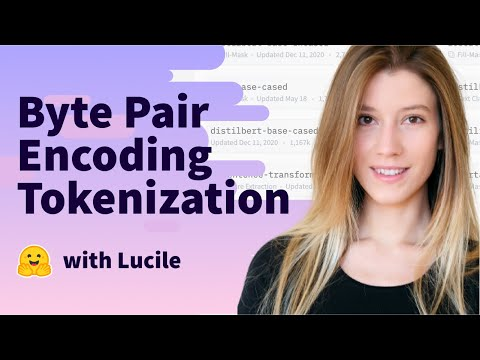

In [ ]:
# Here is a youtube video. See in colab:

from IPython.display import YouTubeVideo
YouTubeVideo('HEikzVL-lZU')